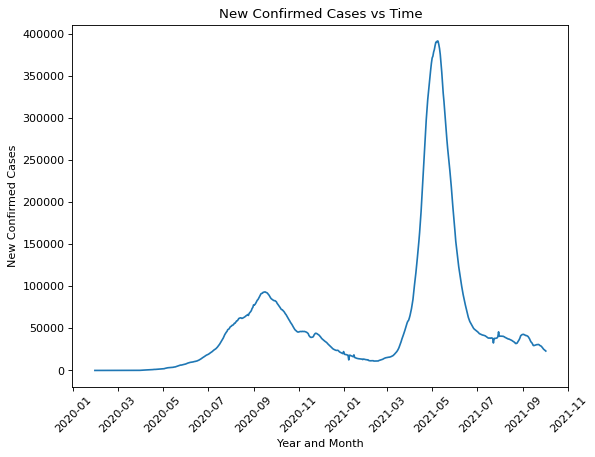


The Correlation Coefficient Between lagged series and original series is:  new_cases    0.999064
dtype: float64 



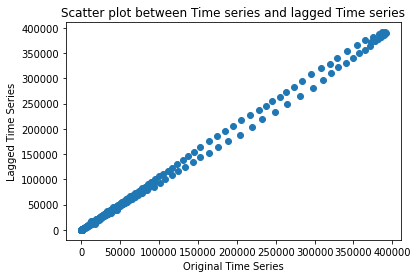

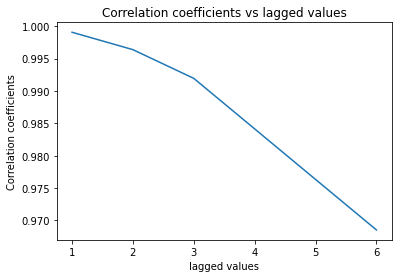

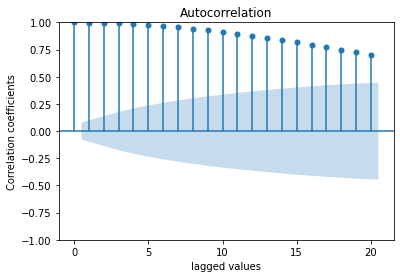

In [1]:
"""
Vikas Dangi
B20238
DS3-Lab 6
"""

# Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AutoReg


# reading the file
df=pd.read_csv('daily_covid_cases.csv',parse_dates=["Date"], sep=',')

#Q1

#A
#PLotting line graph
plt.figure(figsize=(8, 6), dpi=80)
plt.title("New Confirmed Cases vs Time")
plt.plot(df['Date'],df['new_cases'])
plt.xticks(rotation=45)
plt.xlabel("Year and Month")
plt.ylabel("New Confirmed Cases")
plt.show()

#B
#Shifting the time series by timelag 1
df = df.set_index('Date')
new_cases_lag1=df.shift(1)
# df["new_cases_lag2"]=df["new_cases"].shift(2)

# Calculating the Correlation Coefficient Between lagged series and original series
correlation1=new_cases_lag1.corrwith(df["new_cases"])
print("\nThe Correlation Coefficient Between lagged series and original series is: ",correlation1,"\n")

#C
plt.title("Scatter plot between Time series and lagged Time series")
plt.scatter(df,new_cases_lag1)
plt.xlabel("Original Time Series")
plt.ylabel("Lagged Time Series")
plt.show()

#D
# Doing the same for different lag values
lag=[1,2,3,6]
corcof=[correlation1]
new_cases_lag2=df.shift(2)
new_cases_lag3=df.shift(3)
new_cases_lag6=df.shift(6)
corcof.append(new_cases_lag2.corrwith(df["new_cases"]))
corcof.append(new_cases_lag3.corrwith(df["new_cases"]))
corcof.append(new_cases_lag6.corrwith(df["new_cases"]))

# Plotting line plot of Correlation coefficients vs lagged values
plt.title("Correlation coefficients vs lagged values")
plt.plot(lag,corcof)
plt.xlabel("lagged values")
plt.ylabel("Correlation coefficients")
plt.show()

#E
# Plotting the same using plot_acf for lag value 20
plot_acf(df,lags=20)
plt.xlabel("lagged values")
plt.ylabel("Correlation coefficients")
plt.show()


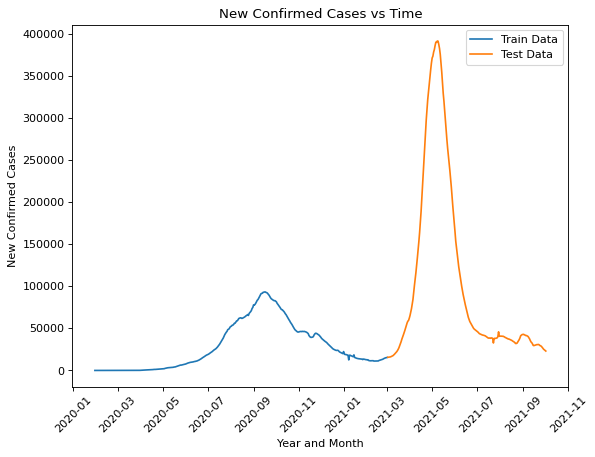


The coefficients are:
 [ 5.99548333e+01  1.03675933e+00  2.61712336e-01  2.75612628e-02
 -1.75391955e-01 -1.52461366e-01]

The prediction accuracy on the data using root mean squared error is: 1.825

The prediction accuracy on the data using Mean absolute percentage error is: 1.575


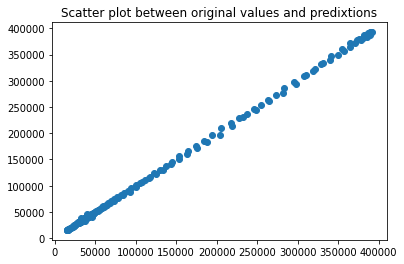

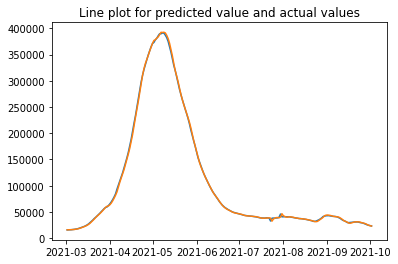

In [6]:
# Q2

# A
tst_sz=math.ceil(len(df)*0.35)
train, test=df[:len(df)-tst_sz], df[len(df)-tst_sz:]

# Plotting the test and train data
plt.figure(figsize=(8, 6), dpi=80)
plt.title("New Confirmed Cases vs Time")
plt.plot(train.index,train)
plt.plot(test.index,test)
plt.xticks(rotation=45)
plt.legend(["Train Data", "Test Data"])
plt.xlabel("Year and Month")
plt.ylabel("New Confirmed Cases")
plt.show()

# Making the autoregression model
X=train.values.squeeze()
y=test.values.squeeze()

# creating a autoregression model
model=AutoReg(X,lags=5)
model_fit = model.fit() # fit/train the model
coef = model_fit.params # Get the coefficients of AR model
print("\nThe coefficients are:\n", coef)


# B
#using these coefficients walk forward over time steps in test, one step each time
window=5
history = X[len(train)-window:]
history=list(history)
predictions = list() # List to hold the predictions, 1 step at a time
for t in range(len(y)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0] # Initialize to w0
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1] # Add other values
    obs = y[t]
    predictions.append(yhat) #Append predictions to compute RMSE later
    history.append(obs) # Append actual test value to history, to be used in next step.
rmse_error=np.sqrt((sum((predictions-y)**2))/y.shape[0])
rmse_percent=rmse_error/(sum(y)/y.shape[0])*100
mape=sum(abs(predictions-y)/y)*100/len(y)
print("\nThe prediction accuracy on the data using root mean squared error is:",format(rmse_percent, '.3f'))
print("\nThe prediction accuracy on the data using Mean absolute percentage error is:",format(mape, '.3f'))

# Scatter plot between original values and predixtions
plt.scatter(y,predictions)
plt.title("Scatter plot between original values and predixtions")
plt.show()
# Line plot for predicted value and actual values
plt.plot(test.index,y)
plt.title("Line plot for predicted value and actual values")
plt.plot(test.index,predictions)
plt.show()

The prediction accuracy on the  data using RMSE for lag=  1  is: 5.373
The prediction accuracy on the  data using MAPE for lag=  1  is: 3.447
The prediction accuracy on the  data using RMSE for lag=  5  is: 1.825
The prediction accuracy on the  data using MAPE for lag=  5  is: 1.575
The prediction accuracy on the  data using RMSE for lag=  10  is: 1.686
The prediction accuracy on the  data using MAPE for lag=  10  is: 1.519
The prediction accuracy on the  data using RMSE for lag=  15  is: 1.612
The prediction accuracy on the  data using MAPE for lag=  15  is: 1.496
The prediction accuracy on the  data using RMSE for lag=  25  is: 1.703
The prediction accuracy on the  data using MAPE for lag=  25  is: 1.535


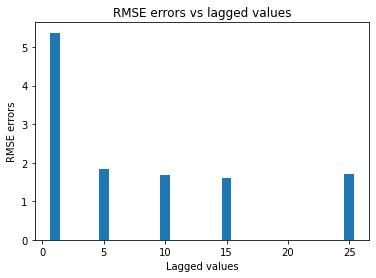

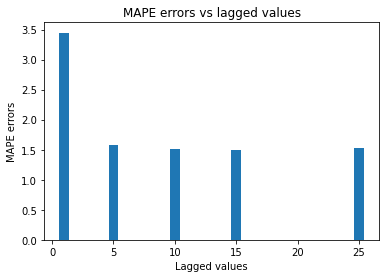

In [3]:
# Q3
lagu=[1, 5, 10, 15, 25 ]
rmselist=[]
mapelist=[]
for window in lagu:
    # creating a autoregression model
    model=AutoReg(X,lags=window)
    model_fit = model.fit() # fit/train the model
    coef = model_fit.params # Get the coefficients of AR model

    history = X[len(train)-window:]
    history=list(history)
    predictions = list() # List to hold the predictions, 1 step at a time
    for t in range(len(y)):
        length = len(history)
        lag = [history[i] for i in range(length-window,length)]
        yhat = coef[0] # Initialize to w0
        for d in range(window):
            yhat += coef[d+1] * lag[window-d-1] # Add other values
        obs = y[t]
        predictions.append(yhat) #Append predictions to compute RMSE later
        history.append(obs) # Append actual test value to history, to be used in next step.
    rmse_error=np.sqrt((sum((predictions-y)**2))/y.shape[0])
    rmse_percent=rmse_error/(sum(y)/y.shape[0])*100
    mape=sum(abs(predictions-y)/y)*100/len(y)
    print("The prediction accuracy on the  data using RMSE for lag= ",window, " is:",format(rmse_percent, '.3f'))
    print("The prediction accuracy on the  data using MAPE for lag= ",window, " is:",format(mape, '.3f'))
    rmselist.append(rmse_percent)
    mapelist.append(mape)

# Plotting RMSE errors vs lagged values
plt.title("RMSE errors vs lagged values")
plt.bar(lagu,rmselist)
plt.xlabel("Lagged values")
plt.ylabel("RMSE errors")
plt.show()

# PLotting MAPE vs lagged values
plt.title("MAPE errors vs lagged values")
plt.bar(lagu,mapelist)
plt.xlabel("Lagged values")
plt.ylabel("MAPE errors")
plt.show()

In [4]:
# Q4
# Finding the value of appropiate p using a condition on autocorrelation
check=0
lg=0
while(check!=-1):
    lg+=1
    new_cases_lag=train["new_cases"].shift(lg)
    # Calculating the Correlation Coefficient Between lagged series and original series
    correlation=new_cases_lag.corr(train["new_cases"])
    # checking our condition to get approriate vakue of lag
    if(abs(correlation) < 2/math.sqrt(len(train["new_cases"]))):
        check=-1
lg-=1

window=lg
model=AutoReg(X,lags=window)
model_fit = model.fit() # fit/train the model
coef = model_fit.params # Get the coefficients of AR model
history = X[len(train)-window:]
history=list(history)
predictions = [] # List to hold the predictions, 1 step at a time
for t in range(len(y)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0] # Initialize to w0
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1] # Add other values
        obs = y[t]
    predictions.append(yhat) #Append predictions to compute RMSE later
    history.append(obs) # Append actual test value to history, to be used in next step.
# calculating the errors
rmse_error=np.sqrt((sum((predictions-y)**2))/y.shape[0])
rmse_percent=rmse_error/(sum(y)/y.shape[0])*100
mape=sum(abs(predictions-y)/y)*100/len(y)

# printing the results
print("\nThe heuristic value of the optimal number of lags is :",lg)
print("\nThe prediction accuracy on the  data using RMSE for lag= ",window, " is:",format(rmse_percent, '.3f'))
print("\nThe prediction accuracy on the  data using MAPE for lag= ",window, " is:",format(mape, '.3f'))


The heuristic value of the optimal number of lags is : 77

The prediction accuracy on the  data using RMSE for lag=  77  is: 1.759

The prediction accuracy on the  data using MAPE for lag=  77  is: 2.026
